# Plotting discrete choropleth shapes

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import pandas as pd
import os
from geomappy.basemap import ProjectCustomExtent
import cartopy.feature as cf

os.chdir("../../../")

Loading data on riverbank plastic observations in the Netherlands (Van Emmerik et al., 2020)

In [4]:
df = pd.read_csv("data/processed_data_SDN/df_hm_included.csv", index_col=0)
df_locations = gpd.read_file("data/processed_data_SDN/df_locations.geojson")

In [5]:
df.columns, df_locations.columns

(Index(['Gebiedscode', 'meting', 'date', 'doy', 'dop', 'plastic_6_packringen',
        'plastic_tassen', 'plastic_kleine_plastic_tasjes',
        'plastic_drankflessen_groterdan_halveliter',
        'plastic_drankflessen_kleinerdan_halveliter',
        ...
        'U_2d_mean', 'U_7d_mean', 'U_14d_mean', 'U_1m_mean', 'U_6m_mean',
        'h_2d_max_above_current', 'h_7d_max_above_current',
        'h_14d_max_above_current', 'h_1m_max_above_current',
        'h_6m_max_above_current'],
       dtype='object', length=161),
 Index(['Gebiedscode', 'river', 'x_maas', 'x_waal', 'geometry'], dtype='object'))

In [11]:
temp_df = df_locations.merge(df.groupby("Gebiedscode")['granulaat_korrels'].count(),
                             left_on='Gebiedscode',
                             right_index=True)
temp_df.loc[temp_df.Gebiedscode.str.contains("REFE"), 'granulaat_korrels'] = 5
temp_df = temp_df.sort_values('granulaat_korrels', ascending=True)

This example requires a little more setup, but the important part happens in the call to ``plot_classified_shapes``. Here discrete values (occurences of observations) are mapped to colors (generated with an incorporated discrete color function) and labels.

/home/caspar/Packages/geomappy/geomappy/plotting.py:492: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors = np.array(colors)


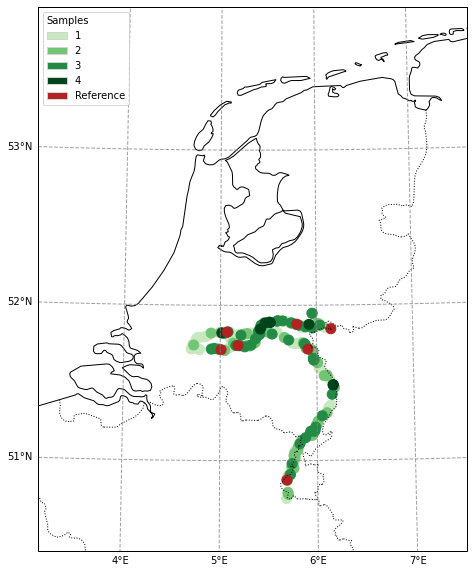

In [14]:
ax = mp.basemap((3.17, 50.4, 7.5, 53.9),
                projection=ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000]),
                resolution='10m', xticks=1, yticks=1, grid_alpha=0.75)
ax.add_feature(
        cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m', facecolor='none', edgecolor='k'),
        label='Stereo', lw=1, linestyle=":")
ax.add_feature(cf.NaturalEarthFeature('physical', 'lakes', '10m', facecolor='none', edgecolor='black'))

ax, legend = mp.plot_classified_shapes(df=temp_df, values='granulaat_korrels', s=100, ax=ax,
                          colors=mp.colors.cmap_discrete("Greens", 5, return_type='list')[1:].tolist()+["Firebrick"],
                          legend_kwargs={'loc': 2, 'title':"Samples", 'align_left':True},
                          linewidth=1,
                          labels=["1", "2", "3", "4", "Reference"])